In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
from numpy.random import default_rng
from sklearn.ensemble import RandomForestClassifier
#import seaborn as sns
#seaborn library does not work even though i installed both to my computer
#and kaggle virtual machine. Because of this a few graphs are missing by the time i upload.
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score, precision_recall_curve
%matplotlib inline

ModuleNotFoundError: No module named 'seaborn'

In [2]:
folder_path = '/kaggle/input/cic-iot-2023'
file_paths = glob.glob(folder_path + '/*.csv')
len(file_paths)


169

In [3]:
df = pd.DataFrame()
for file_path in file_paths[:30]:
    dff = pd.read_csv(file_path)
    df = pd.concat([df, dff], ignore_index=True)

Got Memory error so instead of using all of the files I used the first 30.


In [4]:
df.shape

(8378596, 47)

In [5]:
df.keys()

Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'label'],
      dtype='object')

In [6]:
df['label'].value_counts()

label
DDoS-ICMP_Flood            1293485
DDoS-UDP_Flood              971289
DDoS-TCP_Flood              807156
DDoS-PSHACK_Flood           732907
DDoS-SYN_Flood              729060
DDoS-RSTFINFlood            725613
DDoS-SynonymousIP_Flood     646607
DoS-UDP_Flood               594946
DoS-TCP_Flood               479403
DoS-SYN_Flood               364201
BenignTraffic               196782
Mirai-greeth_flood          177883
Mirai-udpplain              160363
Mirai-greip_flood           134761
DDoS-ICMP_Fragmentation      81114
MITM-ArpSpoofing             55084
DDoS-UDP_Fragmentation       51656
DDoS-ACK_Fragmentation       51322
DNS_Spoofing                 32190
Recon-HostDiscovery          24229
Recon-OSScan                 17789
Recon-PortScan               14607
DoS-HTTP_Flood               12904
VulnerabilityScan             6751
DDoS-HTTP_Flood               5228
DDoS-SlowLoris                4176
DictionaryBruteForce          2362
BrowserHijacking              1081
SqlInjection  

In [7]:
Dos_list=['BenignTraffic',
    'DDoS-ICMP_Flood',
    'DDoS-UDP_Flood',
    'DDoS-TCP_Flood',
    'DDoS-PSHACK_Flood',
    'DDoS-SYN_Flood',
    'DDoS-RSTFINFlood',
    'DDoS-SynonymousIP_Flood',
    'DoS-UDP_Flood',
    'DoS-TCP_Flood',
    'DoS-SYN_Flood',
    'DDoS-ICMP_Fragmentation',
    'DDoS-UDP_Fragmentation',
    'DDoS-ACK_Fragmentation',
    'DoS-HTTP_Flood',
    'DDoS-HTTP_Flood',
    'DDoS-SlowLoris']


In [8]:
df = df[df['label'].isin(Dos_list)]
df.shape

(7747849, 47)

In [9]:
drop_indices= default_rng().choice(df.index,size=6000000,replace=False)

rfc_df=df.drop(index=drop_indices)
rfc_df.shape

(1747849, 47)

In [10]:
print(df['label'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
print()
print(rfc_df['label'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

label
DDoS-ICMP_Flood            16.7%
DDoS-UDP_Flood             12.5%
DDoS-TCP_Flood             10.4%
DDoS-PSHACK_Flood           9.5%
DDoS-SYN_Flood              9.4%
DDoS-RSTFINFlood            9.4%
DDoS-SynonymousIP_Flood     8.3%
DoS-UDP_Flood               7.7%
DoS-TCP_Flood               6.2%
DoS-SYN_Flood               4.7%
BenignTraffic               2.5%
DDoS-ICMP_Fragmentation     1.0%
DDoS-UDP_Fragmentation      0.7%
DDoS-ACK_Fragmentation      0.7%
DoS-HTTP_Flood              0.2%
DDoS-HTTP_Flood             0.1%
DDoS-SlowLoris              0.1%
Name: proportion, dtype: object

label
DDoS-ICMP_Flood            16.7%
DDoS-UDP_Flood             12.6%
DDoS-TCP_Flood             10.4%
DDoS-PSHACK_Flood           9.5%
DDoS-SYN_Flood              9.4%
DDoS-RSTFINFlood            9.3%
DDoS-SynonymousIP_Flood     8.4%
DoS-UDP_Flood               7.6%
DoS-TCP_Flood               6.2%
DoS-SYN_Flood               4.7%
BenignTraffic               2.5%
DDoS-ICMP_Fragmentation     1.1

In [11]:
mapping = {
    'DDoS-ICMP_Flood': 1,
    'DDoS-UDP_Flood': 1,
    'DDoS-TCP_Flood': 1,
    'DDoS-PSHACK_Flood': 1,
    'DDoS-SYN_Flood': 1,
    'DDoS-RSTFINFlood': 1,
    'DDoS-SynonymousIP_Flood': 1,
    'DoS-UDP_Flood': 1,
    'DoS-TCP_Flood': 1,
    'DoS-SYN_Flood': 1,
    'DDoS-ICMP_Fragmentation': 1,
    'DDoS-UDP_Fragmentation': 1,
    'DDoS-ACK_Fragmentation': 1,
    'DoS-HTTP_Flood': 1,
    'DDoS-HTTP_Flood': 1,
    'DDoS-SlowLoris': 1,
    'BenignTraffic': 0}

In [12]:
rfc_df['label'] = rfc_df['label'].map(mapping)
rfc_df['label'].value_counts()

label
1    1703416
0      44433
Name: count, dtype: int64

In [13]:
rfc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1747849 entries, 3 to 8378592
Data columns (total 47 columns):
 #   Column           Dtype  
---  ------           -----  
 0   flow_duration    float64
 1   Header_Length    float64
 2   Protocol Type    float64
 3   Duration         float64
 4   Rate             float64
 5   Srate            float64
 6   Drate            float64
 7   fin_flag_number  float64
 8   syn_flag_number  float64
 9   rst_flag_number  float64
 10  psh_flag_number  float64
 11  ack_flag_number  float64
 12  ece_flag_number  float64
 13  cwr_flag_number  float64
 14  ack_count        float64
 15  syn_count        float64
 16  fin_count        float64
 17  urg_count        float64
 18  rst_count        float64
 19  HTTP             float64
 20  HTTPS            float64
 21  DNS              float64
 22  Telnet           float64
 23  SMTP             float64
 24  SSH              float64
 25  IRC              float64
 26  TCP              float64
 27  UDP              

In [14]:
columnNames = list(rfc_df.columns.values)
columnNames

['flow_duration',
 'Header_Length',
 'Protocol Type',
 'Duration',
 'Rate',
 'Srate',
 'Drate',
 'fin_flag_number',
 'syn_flag_number',
 'rst_flag_number',
 'psh_flag_number',
 'ack_flag_number',
 'ece_flag_number',
 'cwr_flag_number',
 'ack_count',
 'syn_count',
 'fin_count',
 'urg_count',
 'rst_count',
 'HTTP',
 'HTTPS',
 'DNS',
 'Telnet',
 'SMTP',
 'SSH',
 'IRC',
 'TCP',
 'UDP',
 'DHCP',
 'ARP',
 'ICMP',
 'IPv',
 'LLC',
 'Tot sum',
 'Min',
 'Max',
 'AVG',
 'Std',
 'Tot size',
 'IAT',
 'Number',
 'Magnitue',
 'Radius',
 'Covariance',
 'Variance',
 'Weight',
 'label']

In [15]:
Y=rfc_df["label"]
X=rfc_df.drop(["label"],axis=1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [17]:
X_train.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
4256964,0.000000,56.68,6.00,63.9,0.875912,0.875912,0.0,0.0,1.0,0.0,...,56.358085,8.305980,56.68,8.349528e+07,9.5,10.601414,11.766714,584.290264,0.12,141.55
6090522,0.035295,55.63,6.11,64.0,1.052857,1.052857,0.0,0.0,1.0,0.0,...,55.377288,4.535871,55.20,8.308911e+07,9.5,10.519057,6.423772,150.527059,0.14,141.55
2124628,1.534186,91.80,6.00,64.0,0.733542,0.733542,0.0,0.0,1.0,0.0,...,54.000000,0.000000,54.00,8.336530e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55
2395844,0.000000,54.00,6.00,64.0,5.729853,5.729853,0.0,1.0,0.0,1.0,...,54.000000,0.000000,54.00,8.334390e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55
4516214,1.992542,118.80,6.00,64.0,1.457239,1.457239,0.0,0.0,1.0,0.0,...,54.000000,0.000000,54.00,8.336566e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55


In [18]:
rfc = RandomForestClassifier(n_estimators=400,n_jobs=-1,random_state=42)


In [19]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=400, n_jobs=-1, random_state=42)

In [20]:
len(X_test)

349570

In [21]:
predictions=rfc.predict(X_test)

Accuracy:0.9999942786852418
Precision:1.0
Recall:0.9999941355852686


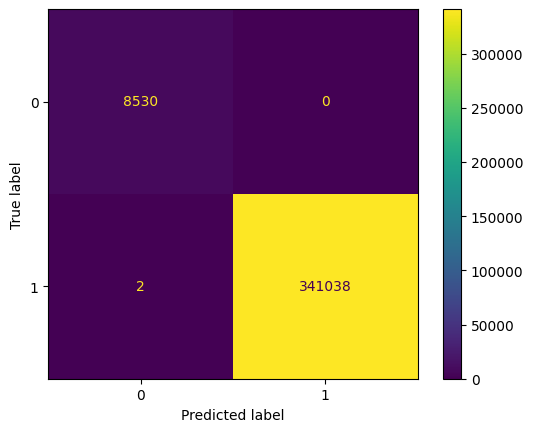

In [22]:
rfc_accuracy=accuracy_score(y_test, predictions)
rfc_precision=precision_score(y_test, predictions)
rfc_recall=recall_score(y_test, predictions)
print("Accuracy:" + str(rfc_accuracy))
print("Precision:" + str(rfc_precision))
print("Recall:" + str(rfc_recall))
cm=confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=rfc.classes_)
#rfc_cv_scores = cross_val_score(rfc, X, Y, cv=5)
#print(rfc_cv_scores)
disp.plot()
plt.show()


In [23]:
feature_scores = pd.Series(rfc.feature_importances_, 
                           index=X_train.columns).sort_values(ascending=False)
feature_scores

urg_count          0.166058
rst_count          0.152027
Number             0.102119
Weight             0.096496
flow_duration      0.092786
IAT                0.091701
Duration           0.062614
Variance           0.050567
Header_Length      0.050478
Max                0.017856
Std                0.013579
ack_flag_number    0.012967
AVG                0.011680
HTTPS              0.011297
Radius             0.010009
Tot size           0.009213
Covariance         0.009137
Magnitue           0.007540
Tot sum            0.007326
Protocol Type      0.003922
Min                0.003594
TCP                0.003222
fin_count          0.002788
ack_count          0.002704
Srate              0.002399
Rate               0.002296
syn_count          0.001096
HTTP               0.000825
UDP                0.000687
syn_flag_number    0.000390
ICMP               0.000238
rst_flag_number    0.000224
fin_flag_number    0.000107
psh_flag_number    0.000021
LLC                0.000010
ARP                0

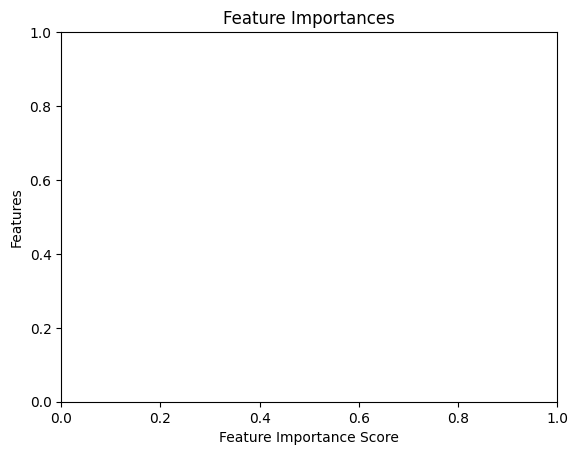

In [24]:
#sns.barplot(x=feature_scores[:10], y=feature_scores.index[:10])
# Again because seaborn library does not work this cell does not work either
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Importances")
plt.show()


 # **DoS Classifier**

In [25]:

clf_mapping = {
    'BenignTraffic': 0,
    'DDoS-ICMP_Flood': 1,
    'DDoS-UDP_Flood': 2,
    'DDoS-TCP_Flood': 3,
    'DDoS-PSHACK_Flood': 4,
    'DDoS-SYN_Flood': 5,
    'DDoS-RSTFINFlood': 6,
    'DDoS-SynonymousIP_Flood': 7,
    'DoS-UDP_Flood': 8,
    'DoS-TCP_Flood': 9,
    'DoS-SYN_Flood': 10,
    'DDoS-ICMP_Fragmentation': 11,
    'DDoS-UDP_Fragmentation': 12,
    'DDoS-ACK_Fragmentation': 13,
    'DoS-HTTP_Flood': 14,
    'DDoS-HTTP_Flood': 15,
    'DDoS-SlowLoris': 16,
    }

In [26]:
clf_df=df.drop(index=drop_indices)
clf_df['label'] = clf_df['label'].map(clf_mapping)

In [27]:
clf_df['label'].value_counts()

label
1     291424
2     219934
3     181856
4     165344
5     164558
6     163262
7     146556
8     133560
9     108088
10     82064
0      44433
11     18393
13     11672
12     11606
14      2975
15      1177
16       947
Name: count, dtype: int64

In [28]:
clf_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1747849 entries, 3 to 8378592
Data columns (total 47 columns):
 #   Column           Dtype  
---  ------           -----  
 0   flow_duration    float64
 1   Header_Length    float64
 2   Protocol Type    float64
 3   Duration         float64
 4   Rate             float64
 5   Srate            float64
 6   Drate            float64
 7   fin_flag_number  float64
 8   syn_flag_number  float64
 9   rst_flag_number  float64
 10  psh_flag_number  float64
 11  ack_flag_number  float64
 12  ece_flag_number  float64
 13  cwr_flag_number  float64
 14  ack_count        float64
 15  syn_count        float64
 16  fin_count        float64
 17  urg_count        float64
 18  rst_count        float64
 19  HTTP             float64
 20  HTTPS            float64
 21  DNS              float64
 22  Telnet           float64
 23  SMTP             float64
 24  SSH              float64
 25  IRC              float64
 26  TCP              float64
 27  UDP              

In [29]:
Y_clf=clf_df["label"]
X_clf=clf_df.drop(["label"],axis=1)


In [30]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, Y_clf, 
                                           test_size=0.2, random_state=42)

In [31]:
scaler = StandardScaler()
X_train_clf = scaler.fit_transform(X_train_clf)
X_test_clf = scaler.transform(X_test_clf)

In [32]:
clf = RandomForestClassifier(n_estimators=400,n_jobs=-1,random_state=42)


In [33]:
clf.fit(X_train_clf,y_train_clf)

RandomForestClassifier(n_estimators=400, n_jobs=-1, random_state=42)

In [34]:
clf_predictions=clf.predict(X_test_clf)

In [2]:
clf_accuracy=accuracy_score(y_test_clf, clf_predictions)
print(clf_accuracy)
#clf_cv_scores = cross_val_score(clf, X_clf, Y_clf, cv=5)
#print(rfc_cv_scores)

NameError: name 'y_test_clf' is not defined

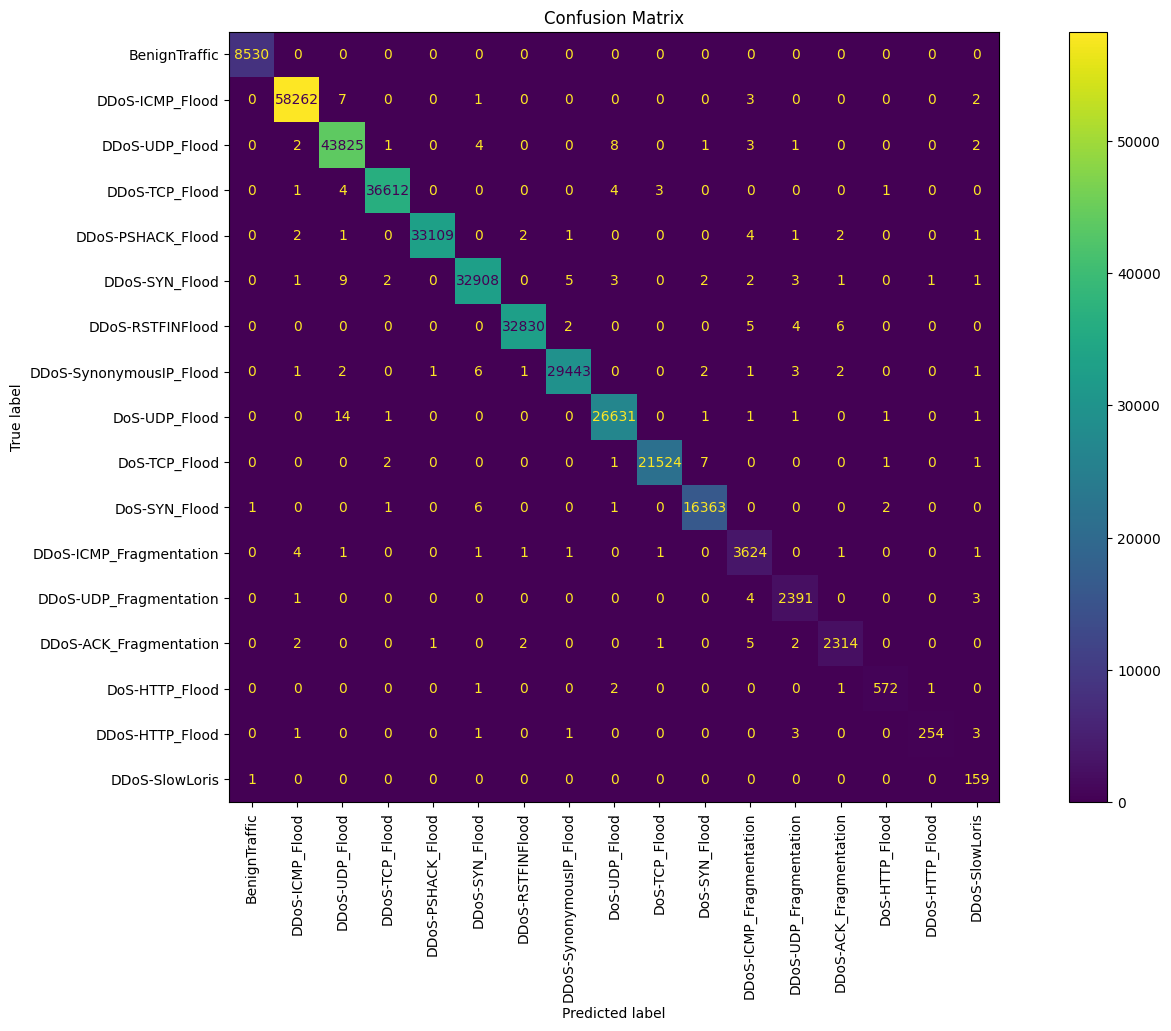

In [36]:
plt.rcParams["figure.figsize"] = (18, 10)
disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        X_test_clf,
        y_test_clf,
        display_labels=Dos_list,
        xticks_rotation='vertical',
        values_format='d',
        include_values=True,
        )
disp.ax_.set_title("Confusion Matrix")

plt.show()

In [37]:
clf_feature_scores = pd.Series(clf.feature_importances_, 
                           index=X_train.columns).sort_values(ascending=False)
clf_feature_scores*100


IAT                26.392483
syn_count           5.824958
Min                 4.855910
Header_Length       4.346302
Magnitue            4.323407
Protocol Type       4.291117
syn_flag_number     4.206434
psh_flag_number     3.813404
Tot size            3.359452
AVG                 3.248554
fin_flag_number     3.166936
flow_duration       2.787395
ack_count           2.774574
Tot sum             2.577923
UDP                 2.523978
urg_count           2.497123
fin_count           2.376209
rst_count           2.312499
TCP                 1.926664
rst_flag_number     1.813298
Max                 1.724696
ack_flag_number     1.700984
ICMP                1.622676
Srate               1.372220
Rate                1.221837
Variance            0.636784
Std                 0.527215
Radius              0.406930
Covariance          0.357390
Number              0.296430
Duration            0.291490
Weight              0.263112
HTTPS               0.080866
HTTP                0.078060
DNS           

In [38]:
plt.rcParams["figure.figsize"] = (8, 6)
sns.barplot(x=clf_feature_scores[:6], y=clf_feature_scores.index[:6])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Feature Importances")
plt.show()

NameError: name 'sns' is not defined

# **Adaboost Algorithm**

In [39]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)

In [40]:
abc_model = abc.fit(X_train_clf, y_train_clf)

In [41]:
abc_predictions = abc_model.predict(X_test_clf)

Accuracy: 0.6582601481820523


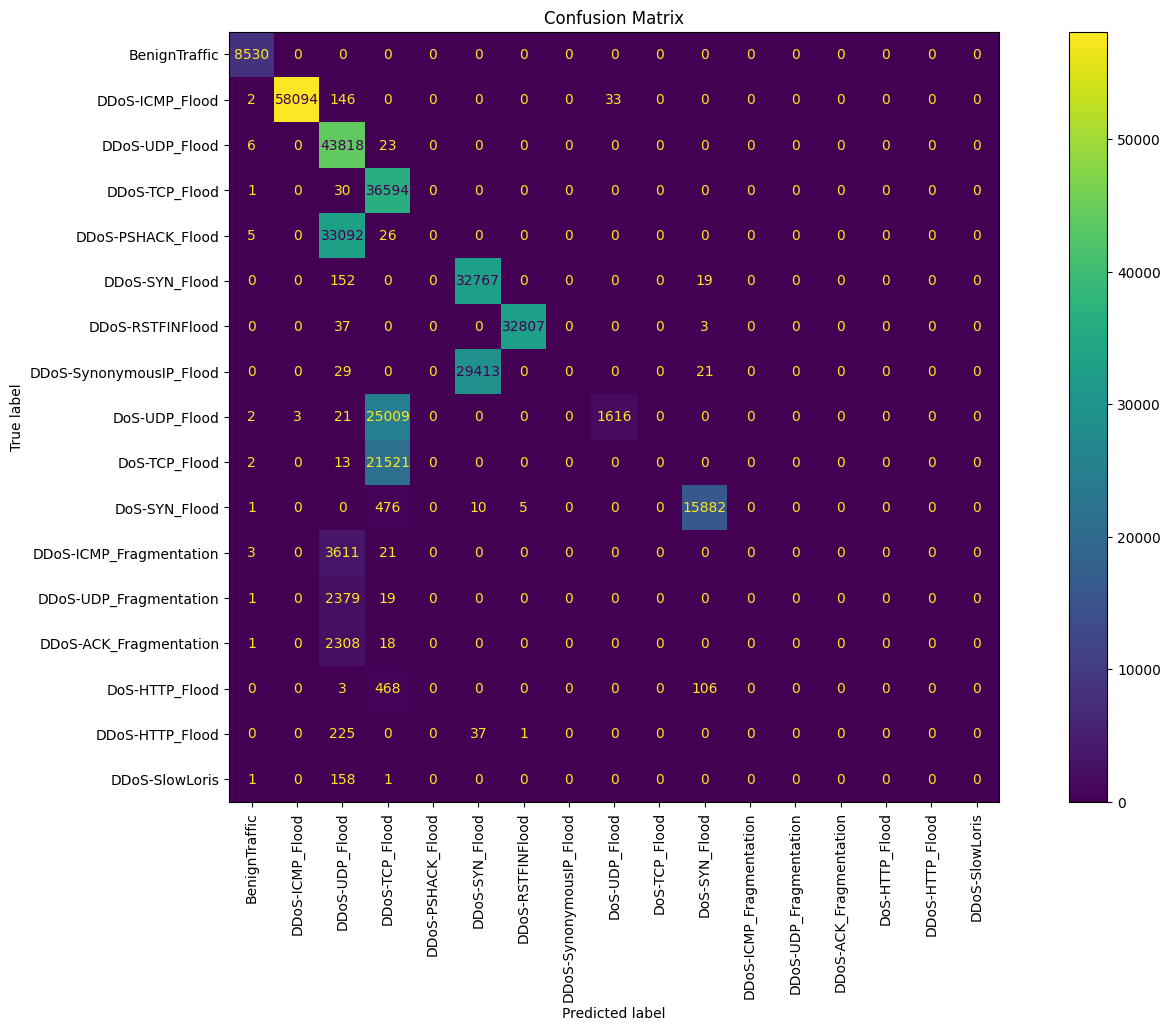

In [53]:
print("Accuracy:", accuracy_score(y_test_clf, abc_predictions))

plt.rcParams["figure.figsize"] = (18, 10)
disp = ConfusionMatrixDisplay.from_estimator(
        abc_model,
        X_test_clf,
        y_test_clf,
        display_labels=Dos_list,
        xticks_rotation='vertical',
        values_format='d',
        include_values=True,
        )
disp.ax_.set_title("Confusion Matrix")

plt.show()


# **Logistic Regression**

In [47]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_clf, y_train_clf)

logistic_predictions = logreg.predict(X_test_clf)

/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8440770088966445


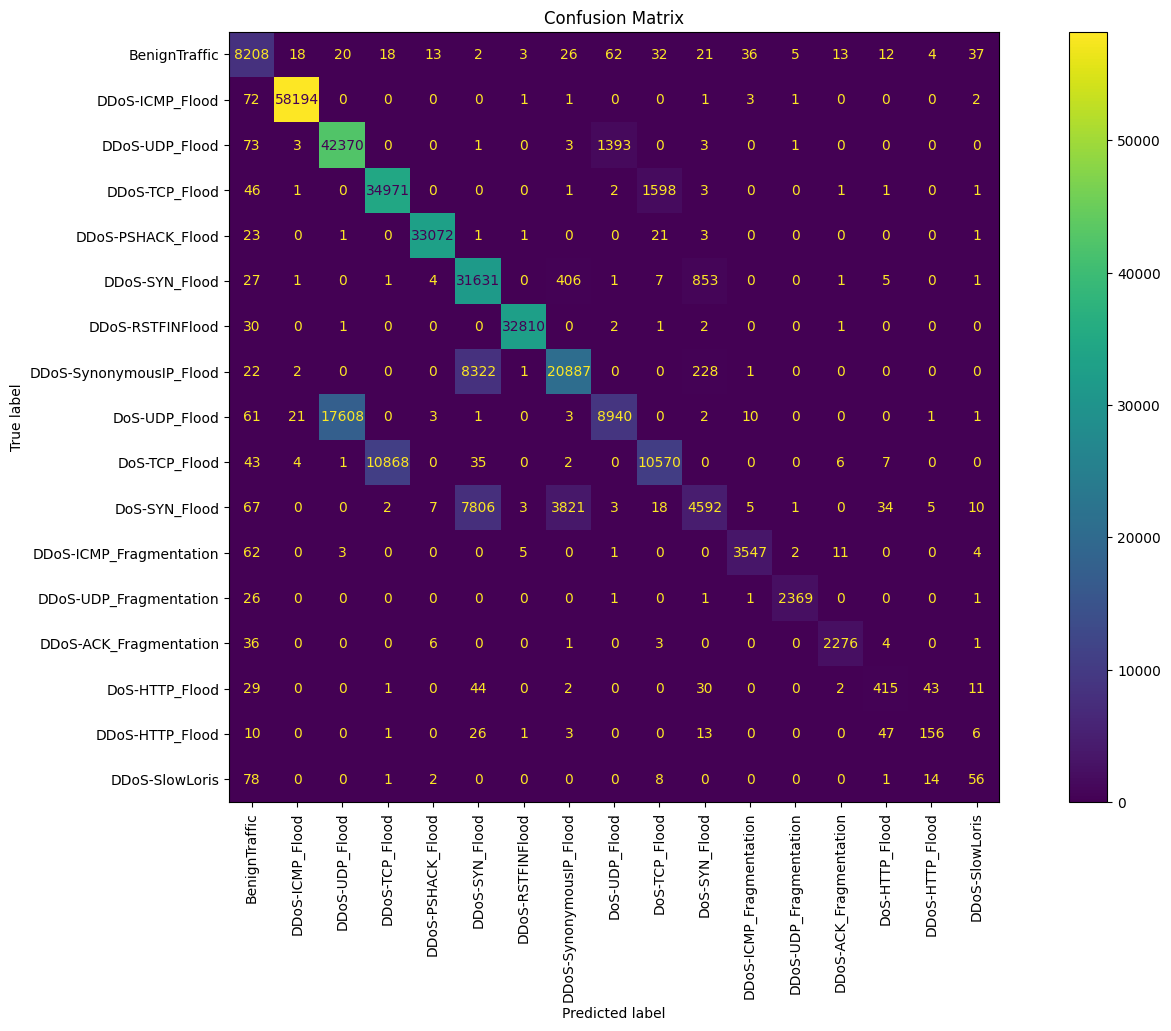

In [49]:
print("Accuracy:", accuracy_score(y_test_clf, logistic_predictions))
plt.rcParams["figure.figsize"] = (18, 10)
disp = ConfusionMatrixDisplay.from_estimator(
        logreg,
        X_test_clf,
        y_test_clf,
        display_labels=Dos_list,
        xticks_rotation='vertical',
        values_format='d',
        include_values=True,
        )
disp.ax_.set_title("Confusion Matrix")

plt.show()

